In [106]:
import seaborn as sns
import pandas as pd
data=pd.read_excel("/Users/vasukhanna/Desktop/DryBeanDataset/Dry_Bean_Dataset.xlsx")
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [108]:
#q3 a
pd.value_counts(data["Class"])
# plt.legend()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

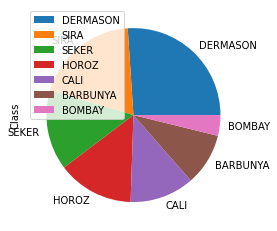

In [109]:
#q3 a
pd.value_counts(data["Class"]).plot.pie()
plt.legend()


<AxesSubplot:xlabel='Class', ylabel='ConvexArea'>

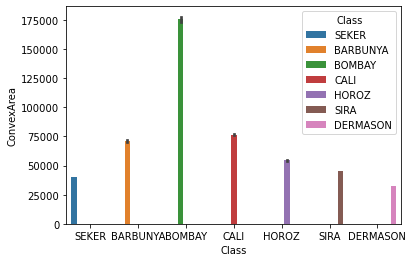

In [110]:
#q3  b
sns.barplot(data=data, x="Class", y="ConvexArea", hue="Class")

No handles with labels found to put in legend.


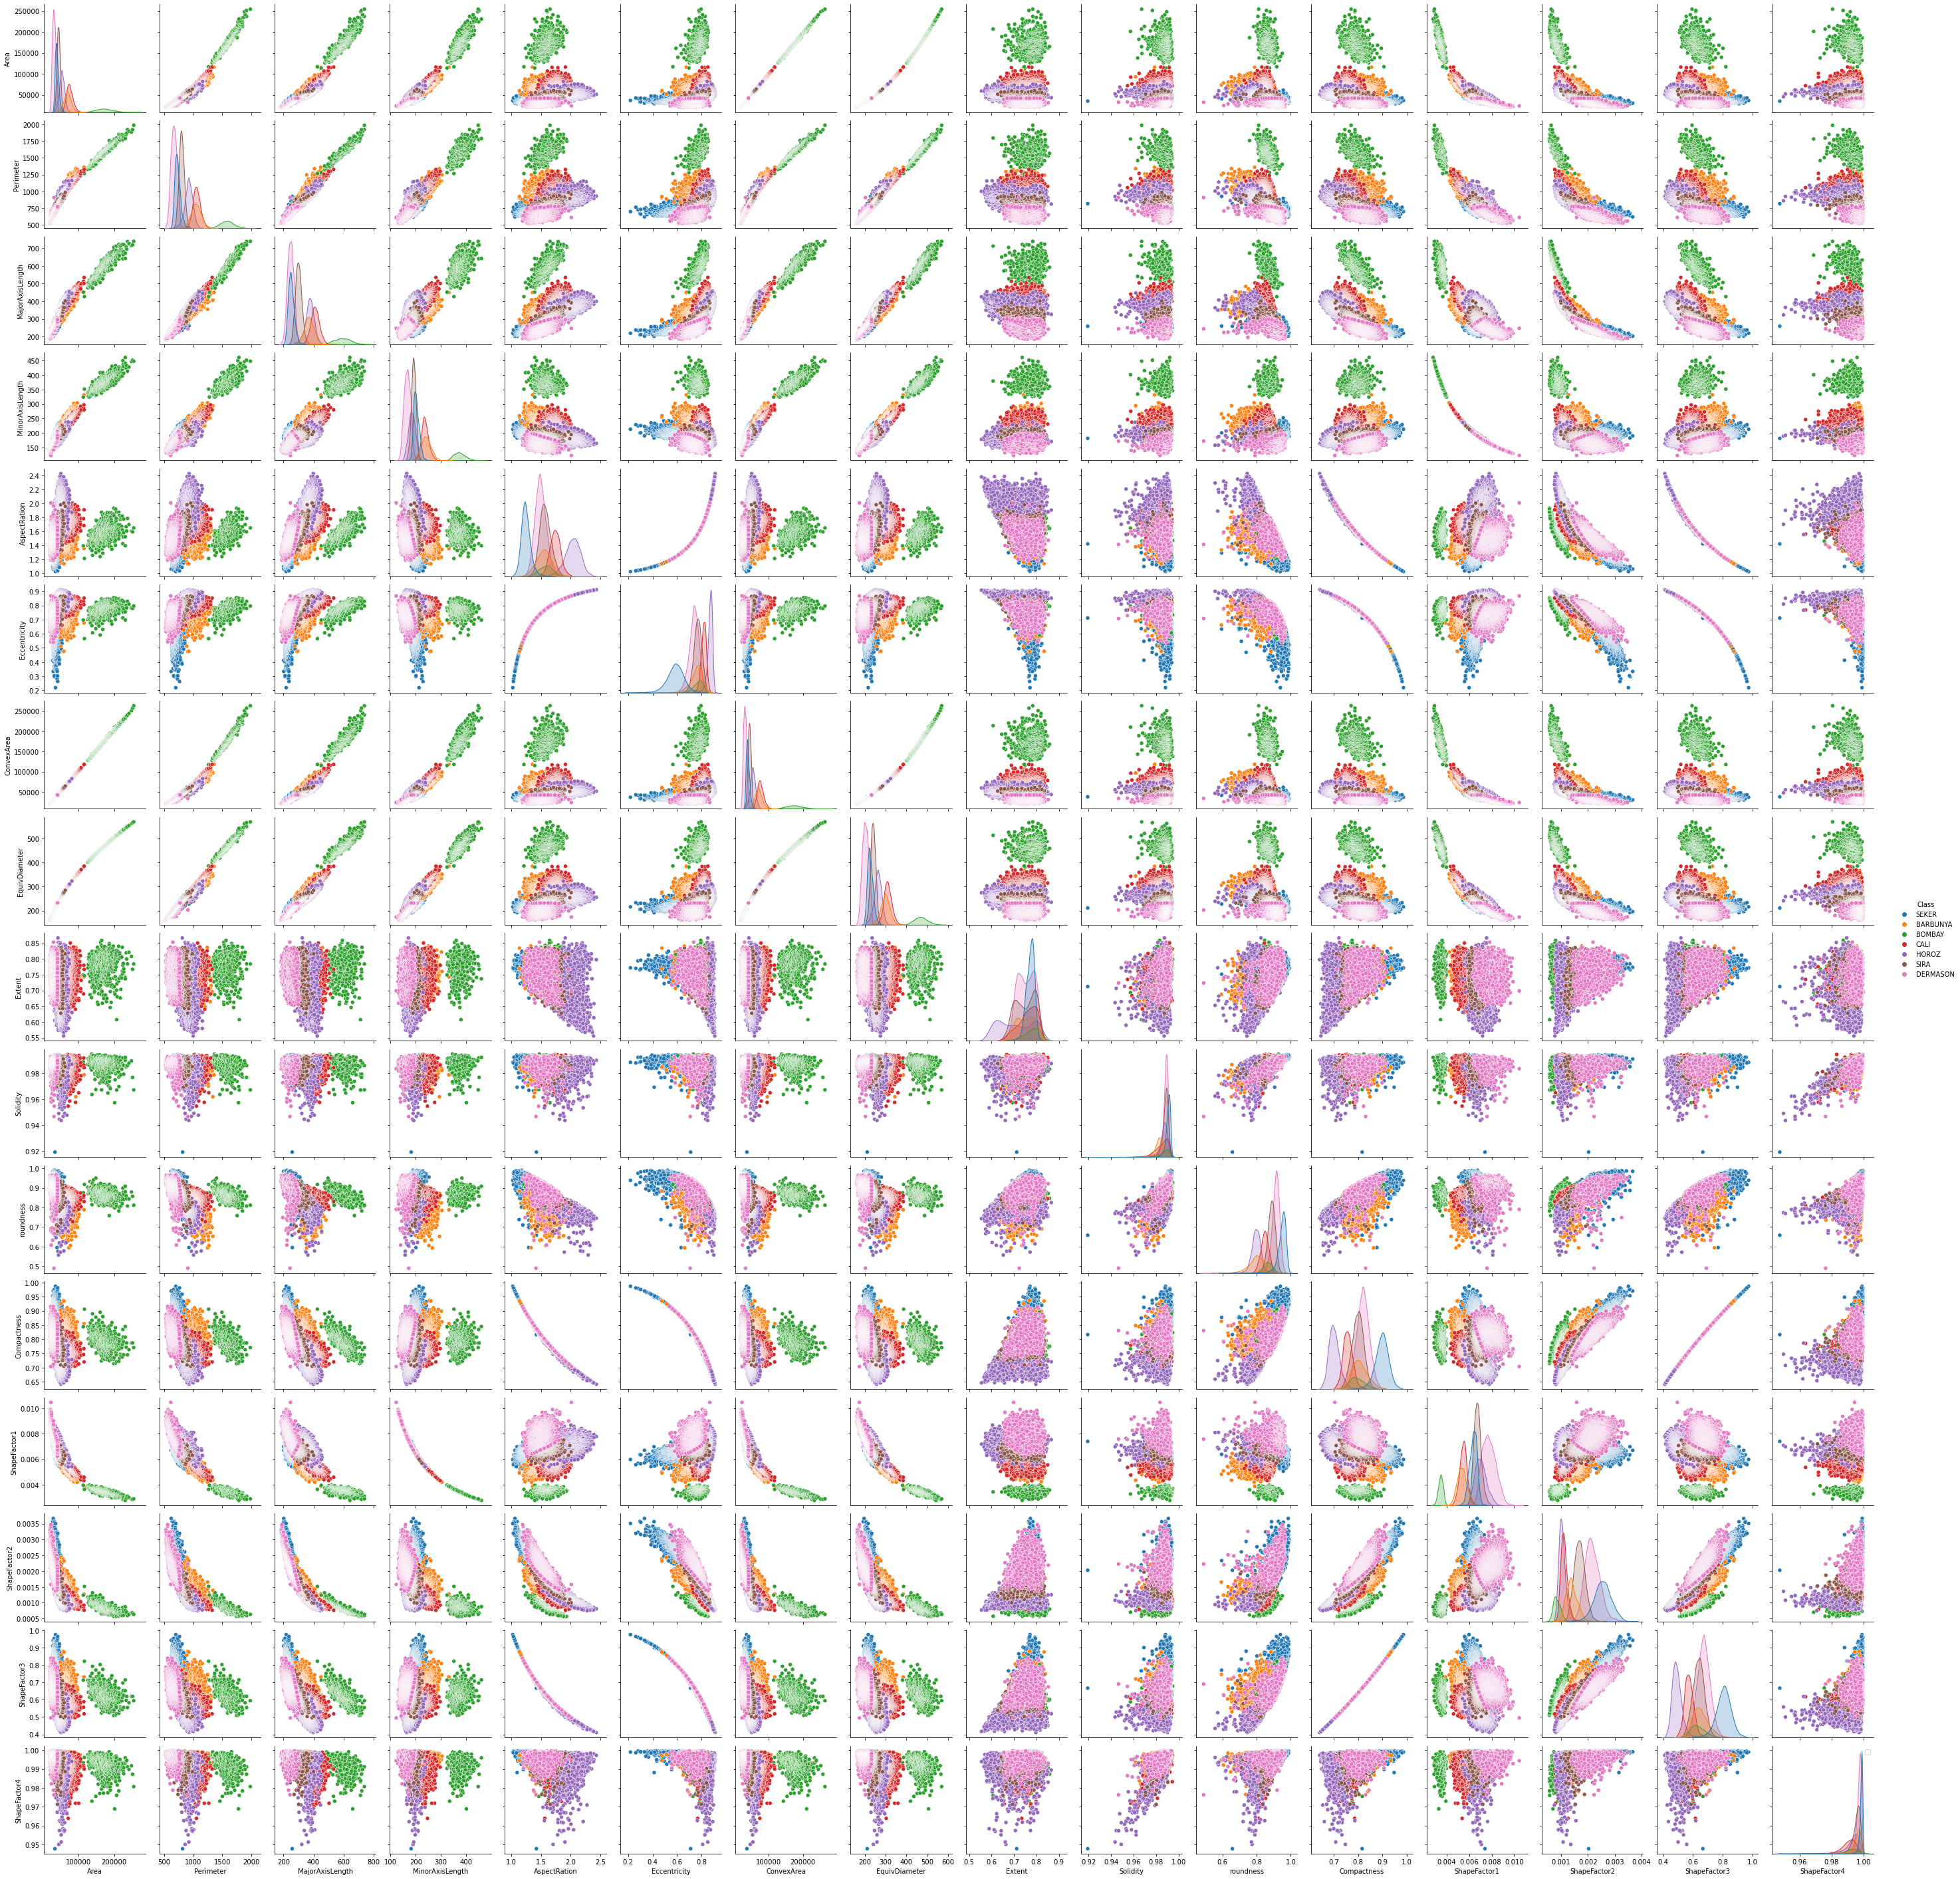

In [63]:
#q3 b
sns.pairplot(data,hue='Class')



In [111]:
#q3 b
mat=data.corr()

<AxesSubplot:>

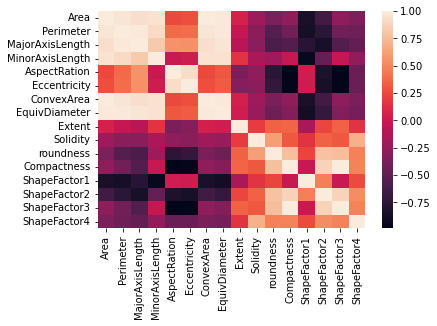

In [112]:
sns.heatmap(mat)

In [113]:
# getting the missing values b part
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [114]:
#q3 c
tsne = TSNE()
results = tsne.fit_transform(data.drop('Class',axis=1))
print(results)

[[ 75.83226    -8.665489 ]
 [ 64.220566  -15.144177 ]
 [ 54.062286  -32.67133  ]
 ...
 [  3.1421876 -29.171907 ]
 [  0.681551  -30.284927 ]
 [  2.279926  -29.518972 ]]


/var/folders/zr/yqnbpb7n7vvcvk35sn9k86640000gn/T/ipykernel_63802/41259615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = results[:,0]
/var/folders/zr/yqnbpb7n7vvcvk35sn9k86640000gn/T/ipykernel_63802/41259615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = results [:,1]


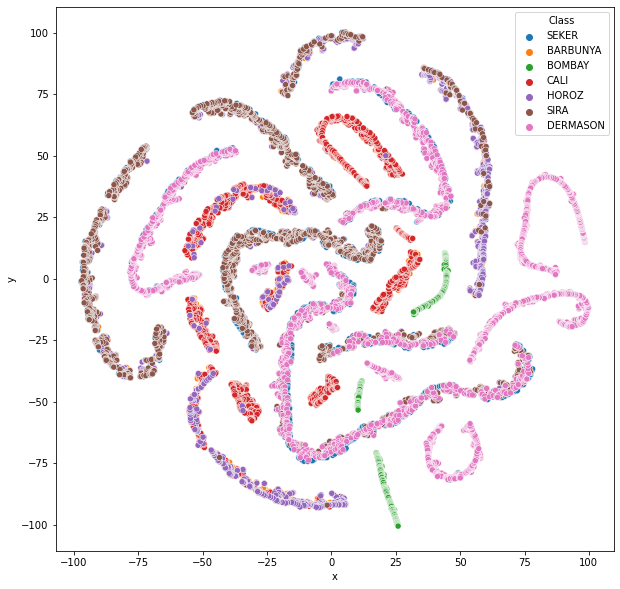

In [115]:
df = data.iloc[:,-1:]
df['x'] = results[:,0] 
df['y'] = results [:,1]
sns.scatterplot(x = "x", y = "y", hue = "Class", data = df)
plt.gcf().set_size_inches((10, 10)) 
plt.show()

In [117]:
l1=results[:,0]
l2=results[:,1]
l3=data["Class"]
tsne_r=pd.DataFrame(results)
results=pd.concat([tsne_r,data['Class']],axis=1)

In [118]:
results

0          1     Class
0      75.832260  -8.665489     SEKER
1      64.220566 -15.144177     SEKER
2      54.062286 -32.671329     SEKER
3      49.167233 -78.790886     SEKER
4      45.951515 -81.683975     SEKER
...          ...        ...       ...
13606   6.881732 -27.414957  DERMASON
13607   6.950492 -27.630905  DERMASON
13608   3.142188 -29.171907  DERMASON
13609   0.681551 -30.284927  DERMASON
13610   2.279926 -29.518972  DERMASON

[13611 rows x 3 columns]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


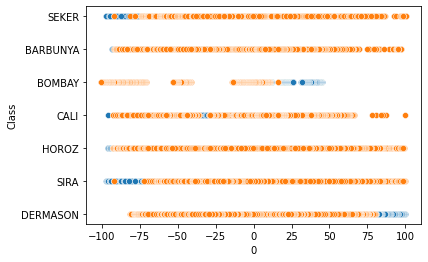

In [119]:

for i in results.columns[:-1]:
    sns.scatterplot(results[i],results['Class'])
 


In [120]:
#q3 d gaussianNB
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
model = GaussianNB()
from sklearn.model_selection import train_test_split
X, y = data.drop('Class',axis=1), data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)
model.fit(X_train,y_train)
predicted= model.predict(X_test_scaled)
print("Accuracy =",model.score(X_test_scaled,y_test)*100)
print(classification_report(y_test,predicted))

Accuracy = 89.7172236503856
              precision    recall  f1-score   support

    BARBUNYA       0.84      0.80      0.82       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.87      0.90      0.88       350
    DERMASON       0.93      0.89      0.91       735
       HOROZ       0.94      0.95      0.95       390
       SEKER       0.93      0.95      0.94       376
        SIRA       0.82      0.86      0.84       525

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



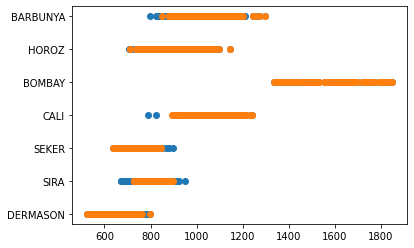

In [121]:
#plotting graph for GNB
plt.scatter(X_test['Perimeter'],y_test)
plt.scatter(X_test['Perimeter'],predicted)
plt.show()

In [122]:
# bernoulliNB
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
from sklearn.model_selection import train_test_split
X, y = data.drop('Class',axis=1), data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)
model.fit(X_train,y_train)
predicted= model.predict(X_test_scaled) 
print("Accuracy =",model.score(X_test_scaled,y_test))
print(classification_report(y_test,predicted))

Accuracy = 0.7293426367976497
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.54      0.68       255
      BOMBAY       0.51      0.34      0.41        92
        CALI       0.63      0.95      0.76       350
    DERMASON       0.74      0.84      0.79       735
       HOROZ       0.84      0.83      0.84       390
       SEKER       0.78      0.75      0.76       376
        SIRA       0.65      0.51      0.57       525

    accuracy                           0.73      2723
   macro avg       0.72      0.68      0.68      2723
weighted avg       0.74      0.73      0.72      2723



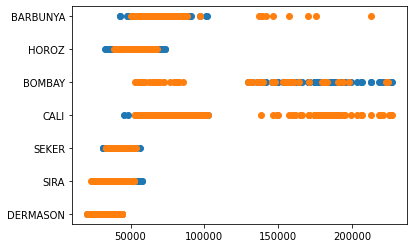

In [123]:
# plotting graph for Bernoulli
plt.scatter(X_test['Area'],y_test)
plt.scatter(X_test['Area'],predicted)
plt.show()

In [124]:
#e part pca
from sklearn.decomposition import PCA
X=data.drop("Class",axis=1)
Y=data["Class"]
N_X=sc.fit_transform(X)
arr=[4,6,8,10,12]
for i in arr:
    Pca=PCA(n_components=i)
    Pca.fit(N_X)
    print("n: ",i)
    PCA_X=Pca.transform(N_X)
    model = GaussianNB()

    X, y = data.drop('Class',axis=1), data['Class']
    X_train, X_test, y_train, y_test = train_test_split(PCA_X, Y, test_size=0.2, random_state=0)
    X_train=sc.fit_transform(X_train)
    X_test_scaled=sc.fit_transform(X_test)
    model.fit(X_train,y_train)
    predicted= model.predict(X_test_scaled)
    print("Accuracy =",model.score(X_test_scaled,y_test)*100)
    print(classification_report(y_test,predicted))


n:  4
Accuracy = 86.59566654425265
              precision    recall  f1-score   support

    BARBUNYA       0.72      0.66      0.69       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.82      0.82      0.82       350
    DERMASON       0.90      0.88      0.89       735
       HOROZ       0.91      0.96      0.93       390
       SEKER       0.91      0.94      0.93       376
        SIRA       0.82      0.82      0.82       525

    accuracy                           0.87      2723
   macro avg       0.87      0.87      0.87      2723
weighted avg       0.86      0.87      0.86      2723

n:  6
Accuracy = 90.12118986412045
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.85      0.89       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.90      0.93      0.91       350
    DERMASON       0.93      0.88      0.90       735
       HOROZ       0.90      0.95      0.92       390
       S

In [125]:
# f part
from sklearn.metrics import roc_auc_score, roc_curve
x=data.iloc[:,:-1].values
y=data.iloc[:, -1].values
model=GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_test_scaled=sc.fit_transform(X_test)
X_train=sc.fit_transform(X_train)

model.fit(X_train,y_train)
predicted_probab= model.predict(X_test_scaled)
y_predicted_probab=model.predict_proba(X_test_scaled)

score=roc_auc_score(y_test,y_predicted_probab,multi_class="ovr")
print("auc_score =",score)


auc_score = 0.9910894997699904


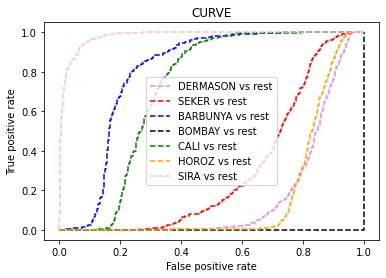

In [136]:
testY=[]

for i in range(len(y_test)):
    testY.append(dic[y_test[i]])
    
truePrate={}

falsePrate={}

threshold={}

no_of_class=7

for i in range(no_of_class):
    
    falsePrate[i],truePrate[i],threshold[i]=roc_curve(testY,y_predicted_probab[:,i],pos_label=i)
    
plt.plot(falsePrate[0],truePrate[0],linestyle='--',color='violet',label='DERMASON vs rest')

plt.plot(falsePrate[1],truePrate[1],linestyle='--',color='red',label='SEKER vs rest')

plt.plot(falsePrate[2],truePrate[2],linestyle='--',color='blue',label='BARBUNYA vs rest')

plt.plot(falsePrate[3],truePrate[3],linestyle='--',color='black',label='BOMBAY vs rest')

plt.plot(falsePrate[4],truePrate[4],linestyle='--',color='green',label='CALI vs rest')

plt.plot(falsePrate[5],truePrate[5],linestyle='--',color='orange',label='HOROZ vs rest')

plt.plot(falsePrate[6],truePrate[6],linestyle='--',color='pink',label='SIRA vs rest')

plt.title('CURVE')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.legend()

In [137]:
# g part Logistic regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000)
X_train=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)
clf.fit(X_train,y_train)
predicted=clf.predict(X_test_scaled)
print("Accuracy =",model.score(X_test_scaled,y_test))
print(classification_report(y_test,predicted))

Accuracy = 0.897172236503856
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.92      0.96      0.94       350
    DERMASON       0.94      0.92      0.93       735
       HOROZ       0.95      0.95      0.95       390
       SEKER       0.95      0.96      0.95       376
        SIRA       0.87      0.88      0.87       525

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



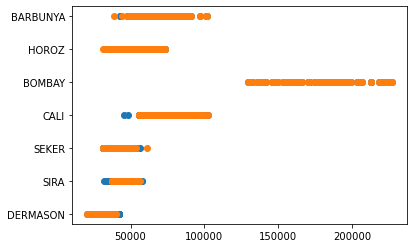

In [128]:
# plotting graph for logistic regression
plt.scatter(X_test['Area'],y_test)
plt.scatter(X_test['Area'],predicted)
plt.show()